# Decision Tress - Ron (XAI)

## Imports

In [1]:
# Basic Libraries
import os
import time
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from collections import Counter

# Database Libraries
import psycopg2
import sqlite3
from sqlalchemy import create_engine, text, Column, Integer, String
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker

# Data Preprocessing and Feature Engineering
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score, top_k_accuracy_score

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

# Advanced Models
from xgboost import XGBClassifier

# Oversampling
from imblearn.over_sampling import SMOTE

# Interpretability
import lime
import lime.lime_tabular

# Statistical Libraries
import statsmodels.api as sm

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Set Plot Style
plt.style.use('Solarize_Light2')

ModuleNotFoundError: No module named 'statsmodels'

### Task 3.6 - Relevance of legal requirements and obligations (Group Task 3)

The group must explain the relevance of legal requirements and obligations included in the group assessment of the project. Ensure to provide reasoning and arguments for both including and excluding specific legal requirements and obligations in the assessment. The reasoning should be supported by facts, details, and examples drawn from multiple sources to substantiate your claims.

If you are developing an AI system that has no or minimal risks, you need to explain the exclusion of each legal requirement and obligation one by one. Provide an explanation and reasoning for why each factor is not applicable to your AI system. 

This evidence is related to **good** criterion. 

[This link](https://github.com/BredaUniversityADSAI/2023-24d-fai1-adsai-teamwork-t18/blob/main/Legal/3.6%20documentation.pdf) contains the full list of articles of the AI act that we have examined, as well as how we would be compliant with them or why they are not important for our examination.

The decisions have been based on the requirements on the [EU AI act](https://artificialintelligenceact.eu/chapter/3/)

### Task 3.7 - Addressing legal obligations (Group Task 3)

The group provides evidence and explanations of their AI system's compliance with legal requirements and obligations.

If you are developing an AI system with no or minimal risks, ensure to write a paragraph explaining how your AI system complies with EU regulations (AI Act).

This evidence is related to **excellent** criterion. 

In [3]:
# Provide your answers here.

## ILO 4.0: Business Understanding

The student is capable to develop a project proposal  and deliver an impactful presentation to communicate the business values, objectives, and outcomes. 	

Demonstrate the ability to develop a compelling project proposal  and deliver an impactful presentation that effectively communicates the business value, objectives, and outcomes of the proposed project:

- **Poor**: Clear individual contribution is documented. A project proposal, compliant with professional standards, is prepared and presented. 

- **Insufficient**: A final presentation, compliant with professional standards, is prepared and presented. And meeting all criteria in poor.

- **Sufficient**: The students demonstrate a profound understanding of business needs and industry context by developing a project proposal that effectively identifies and addresses client requirements. The proposal includes a clear problem statement, define project objectives, and propose feasible solutions that demonstrate a good understanding of the business environment. And meeting all criteria in insufficient.

- **Good**: The students showcase a strong understanding of the business context in the final project presentation, effectively communicating insights. The final presentation is  engaging, well-structured, and emphasizes the practical implications within the broader business context. And meeting all criteria in sufficient.

- **Excellent**: The students have developed an innovative solution that not only aligns closely with the client's specific requirements but also possesses considerable business value. And meeting all criteria in good.

### Task 4.1 - Proposal

Please provide the related link to your team proposal in the following cell. This evidence is related to **poor** and **sufficient** criteria.

[Proposal text](https://github.com/BredaUniversityADSAI/2023-24d-fai1-adsai-teamwork-t18/blob/main/Project%20proposal%20document%20file.pdf)

[Proposal Presentation](https://github.com/BredaUniversityADSAI/2023-24d-fai1-adsai-teamwork-t18/blob/main/Project%20Proposal%20Team%2018.pdf)

### Task 4.2 - Final Presentation

Please provide the related link to your final presentation in the following cell. This evidence pertains to **insufficient**, **good**, and **excellent** criteria.If possible, please save your presentation file as a PDF and provide the corresponding link here.

In [4]:
# Put the link to the final presentation here

## ILO 5.0: Data Understanding and Preparation


### Task 5.1 - Connecting to SQL database

Please provide the necessary code to connect to SQL database in the following cell. This requirement relates to **poor** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

# IMPORTANT: DELETE THE CONNECTION PARAMETERS BEFORE SUBMISSION. THE CODE BLOCK IS HERE JUST TO TEST THE REST OF THE NOTEBOOK

In [5]:
# Database connection parameters
db_params = {
    'host': '194.171.191.226',
    'port': '6379',
    'database': 'postgres',
    'user': 'group18',
    'password': 'blockd_2024group18_44'
}

In [6]:
# Create the connection string
conn_string = f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"

# Create SQLAlchemy engine
engine = create_engine(conn_string)

### Task 5.2 - Accessing Data in Database

Please provide the corresponding code for a simple query to access the data. This requirement is related to the **insufficient** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc. 

### ANWB dataset

In [7]:
# Convert the fetched data into a dataframe

# Query the data
query = '''SELECT * FROM data_lake.safe_driving'''

# Execute the query and fetch the data
with engine.connect() as connection:
    result = connection.execute(text(query))
    data = result.fetchall()

# Define column names
columns = ['eventid', 'event_start', 'event_end', 'duration_seconds', 'latitude', 'longitude', 'speed_kmh', 'end_speed_kmh', 'maxwaarde', 'category', 'incident_severity', 'is_valid', 'road_segment_id', 'road_manager_type', 'road_number', 'road_name', 'place_name', 'municipality_name', 'road_manager_name']

# Create a DataFrame
df = pd.DataFrame(data, columns=columns)

# Convert 'event_start' column to datetime format and use it as an index
df['date'] = pd.to_datetime(df['event_start']).dt.date
df.set_index('date', inplace=True)

# Display the DataFrame
print(df)

              eventid             event_start               event_end  \
date                                                                    
2022-11-28  104828566 2022-11-28 10:47:01.000 2022-11-28 10:47:08.000   
2022-11-28  104830752 2022-11-28 08:15:01.800 2022-11-28 08:15:03.500   
2022-11-28  104831835 2022-11-28 06:41:57.300 2022-11-28 06:41:58.400   
2022-11-28  104709373 2022-11-28 09:17:31.400 2022-11-28 09:17:32.600   
2022-11-28  104644519 2022-11-28 15:20:18.400 2022-11-28 15:20:19.500   
...               ...                     ...                     ...   
2022-11-28  104700933 2022-11-28 08:38:01.400 2022-11-28 08:38:04.800   
2022-11-28  104445333 2022-11-28 17:50:38.400 2022-11-28 17:50:39.600   
2022-11-28  104428804 2022-11-28 18:37:26.000 2022-11-28 18:37:32.000   
2022-11-28  104836009 2022-11-28 16:23:26.600 2022-11-28 16:23:28.800   
2022-11-28  104658312 2022-11-28 16:32:01.400 2022-11-28 16:32:02.700   

            duration_seconds  latitude  longitude 

### Open-Meteo dataset

In [8]:
# Define the API endpoint
api_url = "https://archive-api.open-meteo.com/v1/archive"

# Define the parameters for the API request
params = {
    "latitude": 51.5904,
    "longitude": 4.7936,
    "start_date": "2018-08-15",
    "end_date": "2024-02-29",
    "hourly": "temperature_2m,rain,snowfall,snow_depth,weather_code",
    "timezone": "auto"
}

# Make the API request
response = requests.get(api_url, params=params)


# Parse the JSON response
data = response.json()
    
# Convert the hourly data to a DataFrame
hourly_data = data['hourly']
df_api = pd.DataFrame(hourly_data)
    
# Convert the 'time' column to datetime format
df_api['time'] = pd.to_datetime(df_api['time'])
    
# Set the 'time' column as the index
df_api.set_index('time', inplace=True)
    
# Display the DataFrame
print(df_api.head())

                     temperature_2m  rain  snowfall  snow_depth  weather_code
time                                                                         
2018-08-15 00:00:00            17.7   0.0       0.0         0.0             3
2018-08-15 01:00:00            17.5   0.0       0.0         0.0             3
2018-08-15 02:00:00            17.2   0.0       0.0         0.0             2
2018-08-15 03:00:00            17.1   0.0       0.0         0.0             3
2018-08-15 04:00:00            17.2   0.0       0.0         0.0             2


### Task 5.3 - Pre-processing the Data

Please provide the relevant code to perform preprocessing on the data. Refer to the related criterion for detailed instructions on the preprocessing steps. This criterion is associated with the **sufficient** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

### ANWB dataset

In [9]:
# Define a function to check if there is any other municipality included besides Breda
def check_municipality(municipality):
    if municipality != 'Breda':
        print(municipality)

# Apply the function to each item in the column
_ = df['municipality_name'].apply(lambda x: check_municipality(x))

# Define average speed column
df['avg_speed'] = ((df['speed_kmh'] + df['end_speed_kmh'])/2).astype(int)

# Convert 'maaxwarde' column from float64 to int64
df['maxwaarde'] = df['maxwaarde'].astype(int)

# Drop uneccessary columns
columns_to_drop = ['event_end', 'municipality_name', 'speed_kmh', 'end_speed_kmh', 'road_manager_name', 'event_start', 'is_valid']
df = df.drop(columns = columns_to_drop)

# Sort the DataFrame in descending order based on the index (date)
df = df.sort_values(by='date', ascending=False)

# Display the sorted DataFrame
print(df)

              eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                      
2024-02-29  132356402               1.0  51.57375   4.840390          1   
2024-02-29  132299107               6.0  51.57566   4.762240         44   
2024-02-29  132361793               1.4  51.59944   4.749188          0   
2024-02-29  132333651               1.4  51.59363   4.821770          0   
2024-02-29  132266421               1.6  51.57880   4.715170          0   
...               ...               ...       ...        ...        ...   
2018-01-01    5965673               1.2  51.61430   4.779872          0   
2018-01-01    5350340               1.1  51.60173   4.769984          0   
2018-01-01    5849524               1.7  51.58178   4.826831          0   
2018-01-01    5866239              17.0  51.57177   4.761276         65   
2018-01-01    5618085               1.7  51.59370   4.821939          0   

                    cate

In [10]:
# Convert 'incident_severity' column to string
df['incident_severity'] = df['incident_severity'].astype(str)

In [11]:
# Check for missing values
for column in df.columns:
    missing_values = df[column].isnull().sum()
    print(f"Column '{column}': {missing_values} missing values")

Column 'eventid': 0 missing values
Column 'duration_seconds': 0 missing values
Column 'latitude': 0 missing values
Column 'longitude': 0 missing values
Column 'maxwaarde': 0 missing values
Column 'category': 0 missing values
Column 'incident_severity': 0 missing values
Column 'road_segment_id': 0 missing values
Column 'road_manager_type': 0 missing values
Column 'road_number': 0 missing values
Column 'road_name': 0 missing values
Column 'place_name': 0 missing values
Column 'avg_speed': 0 missing values


In [12]:
# Print unique values of the 'incident_severity' column
unique_values = df['incident_severity'].unique()
print("Unique values in 'incident_severity':", unique_values)

Unique values in 'incident_severity': ['HB1' 'SP1' 'HC1' 'HA1' 'HA3' 'SP2' 'HC2' 'HC16' 'HB2' 'HA2' 'HC4' 'HC13'
 'HC3' 'HC5' 'SP3' 'HB3' 'SP5' 'SP4' 'HC7' 'HC14' 'HC10' 'HC17' 'HC19'
 'HC8' 'HC6' 'HC11' 'HC15' 'HC20' 'SP1  ' 'HC1  ' 'HA1  ' 'HB1  ' 'HC13 '
 'HA3  ' 'HB2  ' 'SP2  ' 'HC2  ' 'HC4  ' 'HA2  ' 'HC5  ' 'HC3  ' 'HB3  '
 'SP3  ' 'SP4  ' 'HC7  ' 'HC14 ' 'HC16 ' 'HC15 ' 'HC17 ' 'HC8  ' 'SP5  '
 'HC10 ' 'HC19 ' 'HC6  ' 'HC21 ' 'HC18 ']


In [13]:
# Define a new function to classify incident types into 3 categories: low, medium, and high-risk
def classify_risk(severity):
    low_risk_severities = ['HA1', 'HB1', 'HC1', 'HC2', 'HC3', 'HC4', 'HC5', 'SP1']
    medium_risk_severities = ['HA2', 'HA3', 'HB2', 'HB3', 'HC6', 'HC7', 'HC8', 'HC10', 'HC13', 'HC14' 'HC11', 'SP2', 'SP3']
    
    if severity in low_risk_severities:
        return 'low risk'
    elif severity in medium_risk_severities:
        return 'medium risk'
    else:
        return 'high risk'

# Apply the function to incident_severity column
df['risk_category'] = df['incident_severity'].apply(classify_risk)

# Print the updated DataFrame
print(df.head(5))

              eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                      
2024-02-29  132356402               1.0  51.57375   4.840390          1   
2024-02-29  132299107               6.0  51.57566   4.762240         44   
2024-02-29  132361793               1.4  51.59944   4.749188          0   
2024-02-29  132333651               1.4  51.59363   4.821770          0   
2024-02-29  132266421               1.6  51.57880   4.715170          0   

                   category incident_severity  road_segment_id  \
date                                                             
2024-02-29          BRAKING               HB1        233197001   
2024-02-29            SPEED               SP1        222197067   
2024-02-29  HARSH CORNERING               HC1        600750245   
2024-02-29  HARSH CORNERING               HC1        231201061   
2024-02-29  HARSH CORNERING               HC1        216198026   

           

In [14]:
# Remove duplicate entries in the 'category' column
df['category'] = df['category'].str.strip()  # Remove whitespaces
df['category'] = df['category'].str.upper()  # Convert to uppercase for consistency

# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
# Identifying which roads have the highest number of incidents and what their types are
# 1. Count the number of incidents per road
incident_counts = df['road_name'].value_counts()
print("Number of incidents per road:")
print(incident_counts)

# 2. Count the types of incidents per road
incident_types_per_road = df.groupby(['road_name', 'category']).size().unstack(fill_value=0)
print("\nTypes of incidents per road:")
print(incident_types_per_road)

# 3. Identify the roads with the most incidents
most_incidents_road = incident_counts.idxmax()
print("\nRoad with the most incidents:", most_incidents_road)

# 4. Get the types of incidents on the road with the most incidents
types_of_incidents_most_road = incident_types_per_road.loc[most_incidents_road]
print("\nTypes of incidents on the road with the most incidents:")
print(types_of_incidents_most_road)

Number of incidents per road:
road_name
Franklin Rooseveltlaan    73053
Graaf Engelbertlaan       71242
Backer en Ruebweg         54888
Tilburgseweg              47826
Moerlaken                 35200
                          ...  
Benedenmoeren                 1
Hertenhoek                    1
Baroniestraat                 1
Scherp Zand                   1
Jan de Wijsestraat            1
Name: count, Length: 1883, dtype: int64

Types of incidents per road:
category                        ACCELERATING  BRAKING  HARSH CORNERING  SPEED
road_name                                                                    
't Blok                                    6        9               31      1
't Haantje                                 0        0                0      9
't Hofflandt                               2       12                7     14
't Zand                                    0        0                0      2
Aalststraat                                2        1                7

#### Identifying outliers

In [16]:
# Remove duplicate entries in the 'incident_severity' column, since some severity categories are mentioned multiple times
df['incident_severity'] = df['incident_severity'].str.strip()  # Remove whitespaces
df['incident_severity'] = df['incident_severity'].str.upper()  # Convert to uppercase for consistency

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Checking the number of incidents per incident category again
print(df['incident_severity'].value_counts())

incident_severity
HC1     440243
SP1     374078
HB1      50406
HA1      30473
SP2      29801
HC2       8876
HA2       8096
HB2       7100
SP3       3329
HC13      2151
HC4       2045
HA3       1606
HB3       1421
HC3       1192
SP4        880
HC16       624
HC7        574
HC5        487
HC14       450
SP5        316
HC8        102
HC17        71
HC6         48
HC15        46
HC10        44
HC19        23
HC11         2
HC18         2
HC20         1
HC21         1
Name: count, dtype: int64


Filtering for incident severity types that have one/ two occurences

HC11 - 2

HC18 - 2

HC20 - 1

HC21 - 1

In [17]:
# Filter for HC3 incidents
hc11_incidents = df[df['incident_severity'] == 'HC11']

# Display the roads where HC11 incidents are recorded
roads_with_hc11 = hc11_incidents['road_name'].unique()
print("Roads with HC11 incidents:")
print(roads_with_hc11)

# Display the rows with HC11 incidents
print("\nDetails of incidents with severity type HC11:")
print(hc11_incidents)

Roads with HC11 incidents:
['Rozenlaan' 'Kloosterlaan']

Details of incidents with severity type HC11:
              eventid  duration_seconds   latitude  longitude  maxwaarde  \
date                                                                       
2023-12-20  128926042               0.4  51.572350   4.785080          0   
2021-07-16   67454339               1.7  51.588303   4.783929          0   

                   category incident_severity  road_segment_id  \
date                                                             
2023-12-20  HARSH CORNERING              HC11        226196054   
2021-07-16  HARSH CORNERING              HC11        226200114   

           road_manager_type road_number     road_name place_name  avg_speed  \
date                                                                           
2023-12-20                 G                 Rozenlaan      Breda          0   
2021-07-16                 G              Kloosterlaan      Breda          6   

      

In [18]:
# Filter for HC18 incidents
hc18_incidents = df[df['incident_severity'] == 'HC18']
roads_with_hc18 = hc18_incidents['road_name'].unique()
print("Roads with HC18 incidents:")
print(roads_with_hc18)

# Display the rows with HC18 incidents
print("\nDetails of incidents with severity type HC18:")
print(hc18_incidents)

Roads with HC18 incidents:
['Baliëndijk']

Details of incidents with severity type HC18:
             eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                     
2019-08-10  33630898               2.6  51.59964   4.795615          0   
2019-08-10  33630897               0.8  51.59966   4.795754          0   

                   category incident_severity  road_segment_id  \
date                                                             
2019-08-10  HARSH CORNERING              HC18        227202103   
2019-08-10  HARSH CORNERING              HC18        227202103   

           road_manager_type road_number   road_name place_name  avg_speed  \
date                                                                         
2019-08-10                 G              Baliëndijk      Breda         35   
2019-08-10                 G              Baliëndijk      Breda         33   

           risk_category  
date     

In [19]:
# Filter for HC20 incidents
hc20_incidents = df[df['incident_severity'] == 'HC20']
roads_with_hc20 = hc20_incidents['road_name'].unique()
print("Roads with HC20 incidents:")
print(roads_with_hc20)

# Display the rows with HC20 incidents
print("\nDetails of incidents with severity type HC20:")
print(hc20_incidents)

Roads with HC20 incidents:
['Groenedijk']

Details of incidents with severity type HC20:
              eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                      
2023-02-06  109764804               0.4  51.60938     4.7892          0   

                   category incident_severity  road_segment_id  \
date                                                             
2023-02-06  HARSH CORNERING              HC20        600121446   

           road_manager_type road_number   road_name place_name  avg_speed  \
date                                                                         
2023-02-06                 G              Groenedijk      Breda         36   

           risk_category  
date                      
2023-02-06     high risk  


In [20]:
# Filter for HC21 incidents
hc21_incidents = df[df['incident_severity'] == 'HC21']
roads_with_hc21 = hc21_incidents['road_name'].unique()
print("Roads with HC21 incidents:")
print(roads_with_hc21)

# Display the rows with HC21 incidents
print("\nDetails of incidents with severity type HC21:")
print(hc21_incidents)

Roads with HC21 incidents:
['Baliëndijk']

Details of incidents with severity type HC21:
             eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                     
2019-08-10  33630899               0.4  51.59959   4.795319          0   

                   category incident_severity  road_segment_id  \
date                                                             
2019-08-10  HARSH CORNERING              HC21        227202103   

           road_manager_type road_number   road_name place_name  avg_speed  \
date                                                                         
2019-08-10                 G              Baliëndijk      Breda         37   

           risk_category  
date                      
2019-08-10     high risk  


In [21]:
# Define the list of incident severity types to remove
severity_to_remove = ['HC11', 'HC18', 'HC21', 'HC20']

# Filter the DataFrame to exclude the rows with specified severity types
df = df.drop(df[(df['incident_severity'].isin(severity_to_remove))].index)

# Display the resulting DataFrame
print("Filtered DataFrame:")
print(df)

Filtered DataFrame:
              eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                      
2024-02-29  132356402               1.0  51.57375   4.840390          1   
2024-02-29  132299107               6.0  51.57566   4.762240         44   
2024-02-29  132361793               1.4  51.59944   4.749188          0   
2024-02-29  132333651               1.4  51.59363   4.821770          0   
2024-02-29  132266421               1.6  51.57880   4.715170          0   
...               ...               ...       ...        ...        ...   
2018-01-01    5965673               1.2  51.61430   4.779872          0   
2018-01-01    5350340               1.1  51.60173   4.769984          0   
2018-01-01    5849524               1.7  51.58178   4.826831          0   
2018-01-01    5866239              17.0  51.57177   4.761276         65   
2018-01-01    5618085               1.7  51.59370   4.821939          0   

    

#### The distribution of data

In [22]:
print(df.describe())

            eventid  duration_seconds       latitude      longitude  \
count  9.618960e+05     961896.000000  961896.000000  961896.000000   
mean   6.944138e+07          6.349353      51.589575       4.771983   
std    3.744535e+07          7.728412       0.018712       0.035390   
min    5.345485e+06          0.300000      51.485760       4.661410   
25%    3.785430e+07          1.400000      51.578460       4.745217   
50%    6.681447e+07          2.500000      51.592690       4.770160   
75%    1.056508e+08          9.000000      51.601960       4.800753   
max    1.323910e+08        517.000000      51.638050       4.871680   

           maxwaarde  road_segment_id      avg_speed  
count  961896.000000     9.618960e+05  961896.000000  
mean       27.755132     4.533113e+08      42.899909  
std        33.563992     1.836790e+08      19.852889  
min         0.000000     2.092070e+08       0.000000  
25%         0.000000     2.271971e+08      28.000000  
50%         1.000000     6.003

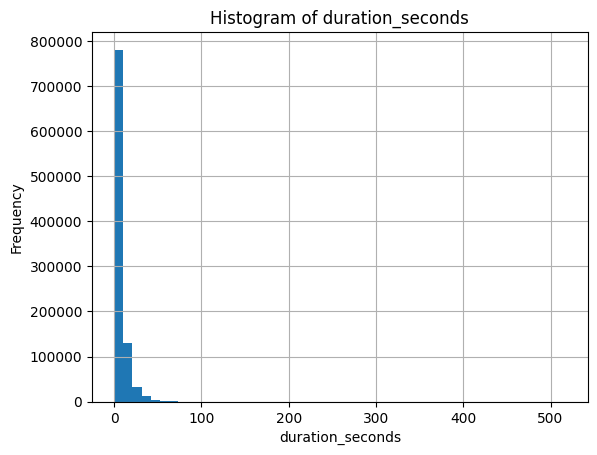

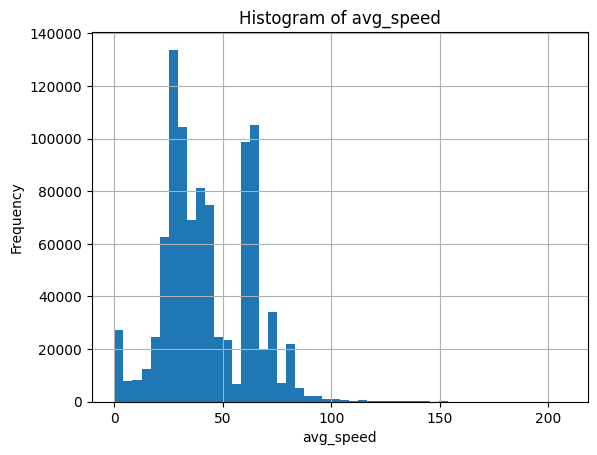

In [23]:
df['duration_seconds'].hist(bins=50)
plt.title('Histogram of duration_seconds')
plt.xlabel('duration_seconds')
plt.ylabel('Frequency')
plt.show()

df['avg_speed'].hist(bins=50)
plt.title('Histogram of avg_speed')
plt.xlabel('avg_speed')
plt.ylabel('Frequency')
plt.show()

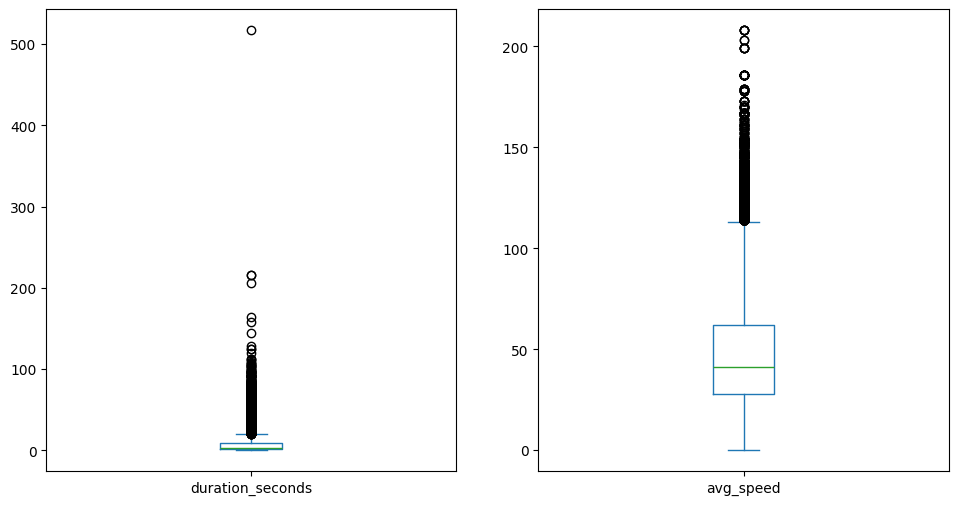

In [24]:
# Box plot for numerical columns
df[['duration_seconds', 'avg_speed']].plot(kind='box', subplots=True, layout=(1, 3), sharey=False, figsize=(18, 6))
plt.show()

In [25]:
# Define the threshold for speeding (e.g., 50 km/h)
speed_threshold = 50

# Mark speeding incidents in the original DataFrame
df['is_speeding'] = df['avg_speed'] > speed_threshold

# Group by road_name and count the number of speeding incidents
speeding_counts = df[df['is_speeding']].groupby('road_name').size().reset_index(name='speeding_count')

# Sort dataframe
speeding_counts = speeding_counts.sort_values(by='speeding_count', ascending=False)

# Display the result
print('Roads with the most instances of speeding:\n', speeding_counts)

Roads with the most instances of speeding:
                   road_name  speeding_count
239     Graaf Engelbertlaan           48806
219  Franklin Rooseveltlaan           33363
483               Moerlaken           27084
684            Tilburgseweg           19807
356             Kapittelweg           19629
..                      ...             ...
671            Tennisstraat               1
308            Hoge Eikberg               1
304          Hoenderparkweg               1
303               Hoeksteen               1
0              't Hofflandt               1

[814 rows x 2 columns]


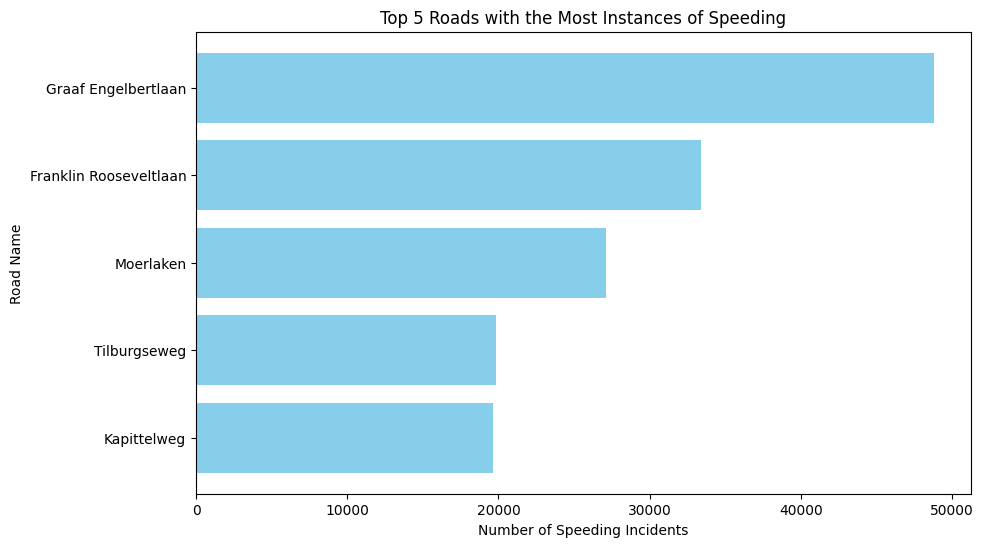

In [26]:
# Filter the top 5 roads
top_5_speeding = speeding_counts.head(5)

# Plot the top 5 roads with the most instances of speeding
plt.figure(figsize=(10, 6))
plt.barh(top_5_speeding['road_name'], top_5_speeding['speeding_count'], color='skyblue')
plt.xlabel('Number of Speeding Incidents')
plt.ylabel('Road Name')
plt.title('Top 5 Roads with the Most Instances of Speeding')
plt.gca().invert_yaxis()  # Invert y-axis to display the road with the highest count at the top
plt.show()

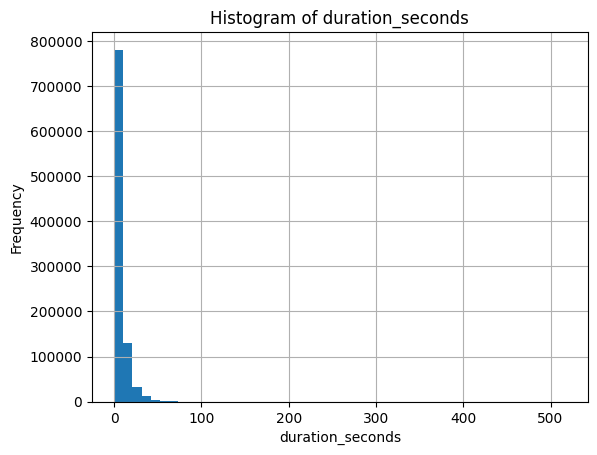

In [27]:
# Calculate the mean of non-zero duration_seconds
mean_duration = df[df['duration_seconds'] > 0]['duration_seconds'].mean()

# Impute the 0 values with the mean duration
df['duration_seconds'] = df['duration_seconds'].replace(0, mean_duration)

df['duration_seconds'].hist(bins=50)
plt.title('Histogram of duration_seconds')
plt.xlabel('duration_seconds')
plt.ylabel('Frequency')
plt.show()

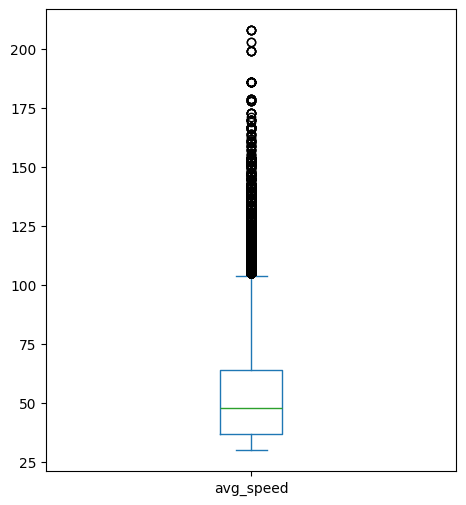

In [28]:
# Remove all instances where the avg_speed < 30kmh
min_speed = 30
df = df[df['avg_speed'] >= min_speed]

# Box plot for numerical columns
df['avg_speed'].plot(kind='box', subplots=True, layout=(1, 3), sharey=False, figsize=(18, 6))
plt.show()

In [29]:
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_duration = find_outliers(df, 'duration_seconds')
outliers_avg_speed = find_outliers(df, 'avg_speed')

# Filter outliers where duration_seconds > 60
outliers_duration_filtered = outliers_duration[outliers_duration['duration_seconds'] > 100]

print("Outliers in duration_seconds:\n", outliers_duration_filtered)
print("Outliers in avg_speed:\n", outliers_avg_speed)

Outliers in duration_seconds:
               eventid  duration_seconds   latitude  longitude  maxwaarde  \
date                                                                       
2024-01-01  129263691             125.0  51.571960   4.778275        101   
2023-08-26  122311627             120.0  51.571720   4.775342        101   
2023-08-03  121153499             106.0  51.606180   4.683664         76   
2023-04-18  112984976             206.0  51.565440   4.807289         41   
2023-04-13  113014971             104.0  51.552090   4.729252         99   
2023-03-20  111490122             517.0  51.574000   4.782903         51   
2023-03-03  112147978             113.0  51.603310   4.815840        104   
2023-02-02  108862285             215.6  51.583220   4.803463         59   
2023-02-02  108862283             215.6  51.583220   4.803463         59   
2022-09-29  101107630             102.0  51.571740   4.761246         86   
2022-08-19   98857252             104.0  51.602650   4.74

In [30]:
# Remove values considered outliers (over average speed of 200)
df = df[df['avg_speed']<=200]

In [31]:
# Mark outliers in the original DataFrame
df['is_outlier_duration'] = df['duration_seconds'].isin(outliers_duration_filtered['duration_seconds'])

# Group by road_name and count the number of outliers
outlier_counts = df[df['is_outlier_duration']].groupby('road_name')['duration_seconds'].agg(['size', 'mean']).reset_index()
outlier_counts.columns = ['road_name', 'outlier_count_duration', 'mean_duration_seconds']

# Sort dataframe
outlier_counts = outlier_counts.sort_values(by='outlier_count_duration', ascending=False)

# Display the result
print('Roads with the highest duration of incidents:\n', outlier_counts)

Roads with the highest duration of incidents:
                  road_name  outlier_count_duration  mean_duration_seconds
3   Franklin Rooseveltlaan                       4                132.775
4      Graaf Engelbertlaan                       4                108.000
1                  Bijster                       2                215.600
11           Rijsbergseweg                       2                108.000
0              Bavelselaan                       1                206.000
2             Emerparklaan                       1                104.000
5                 Heerbaan                       1                106.100
6   Johan Willem Frisolaan                       1                125.000
7             Kloosterlaan                       1                105.000
8                  Markweg                       1                107.000
9          Oosterhoutseweg                       1                113.000
10              Overaseweg                       1               

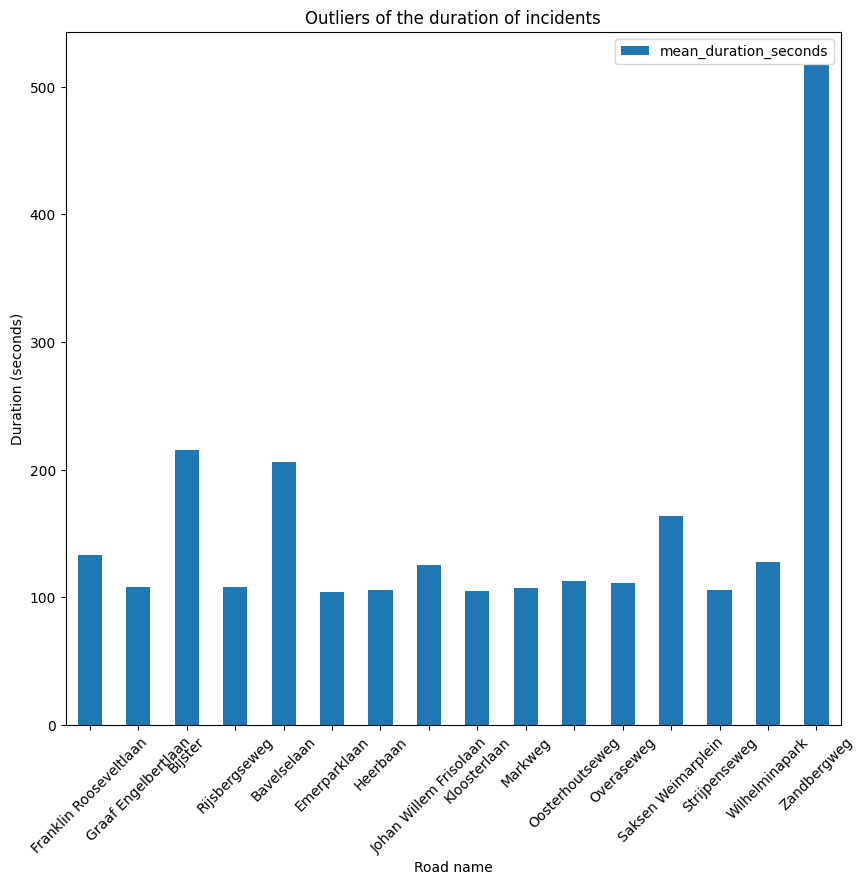

In [32]:
outlier_counts.plot(kind='bar', x= 'road_name', y='mean_duration_seconds', figsize=(10,9))
plt.xticks(rotation=45)
plt.xlabel('Road name')
plt.ylabel('Duration (seconds)')
plt.title('Outliers of the duration of incidents')
plt.show()

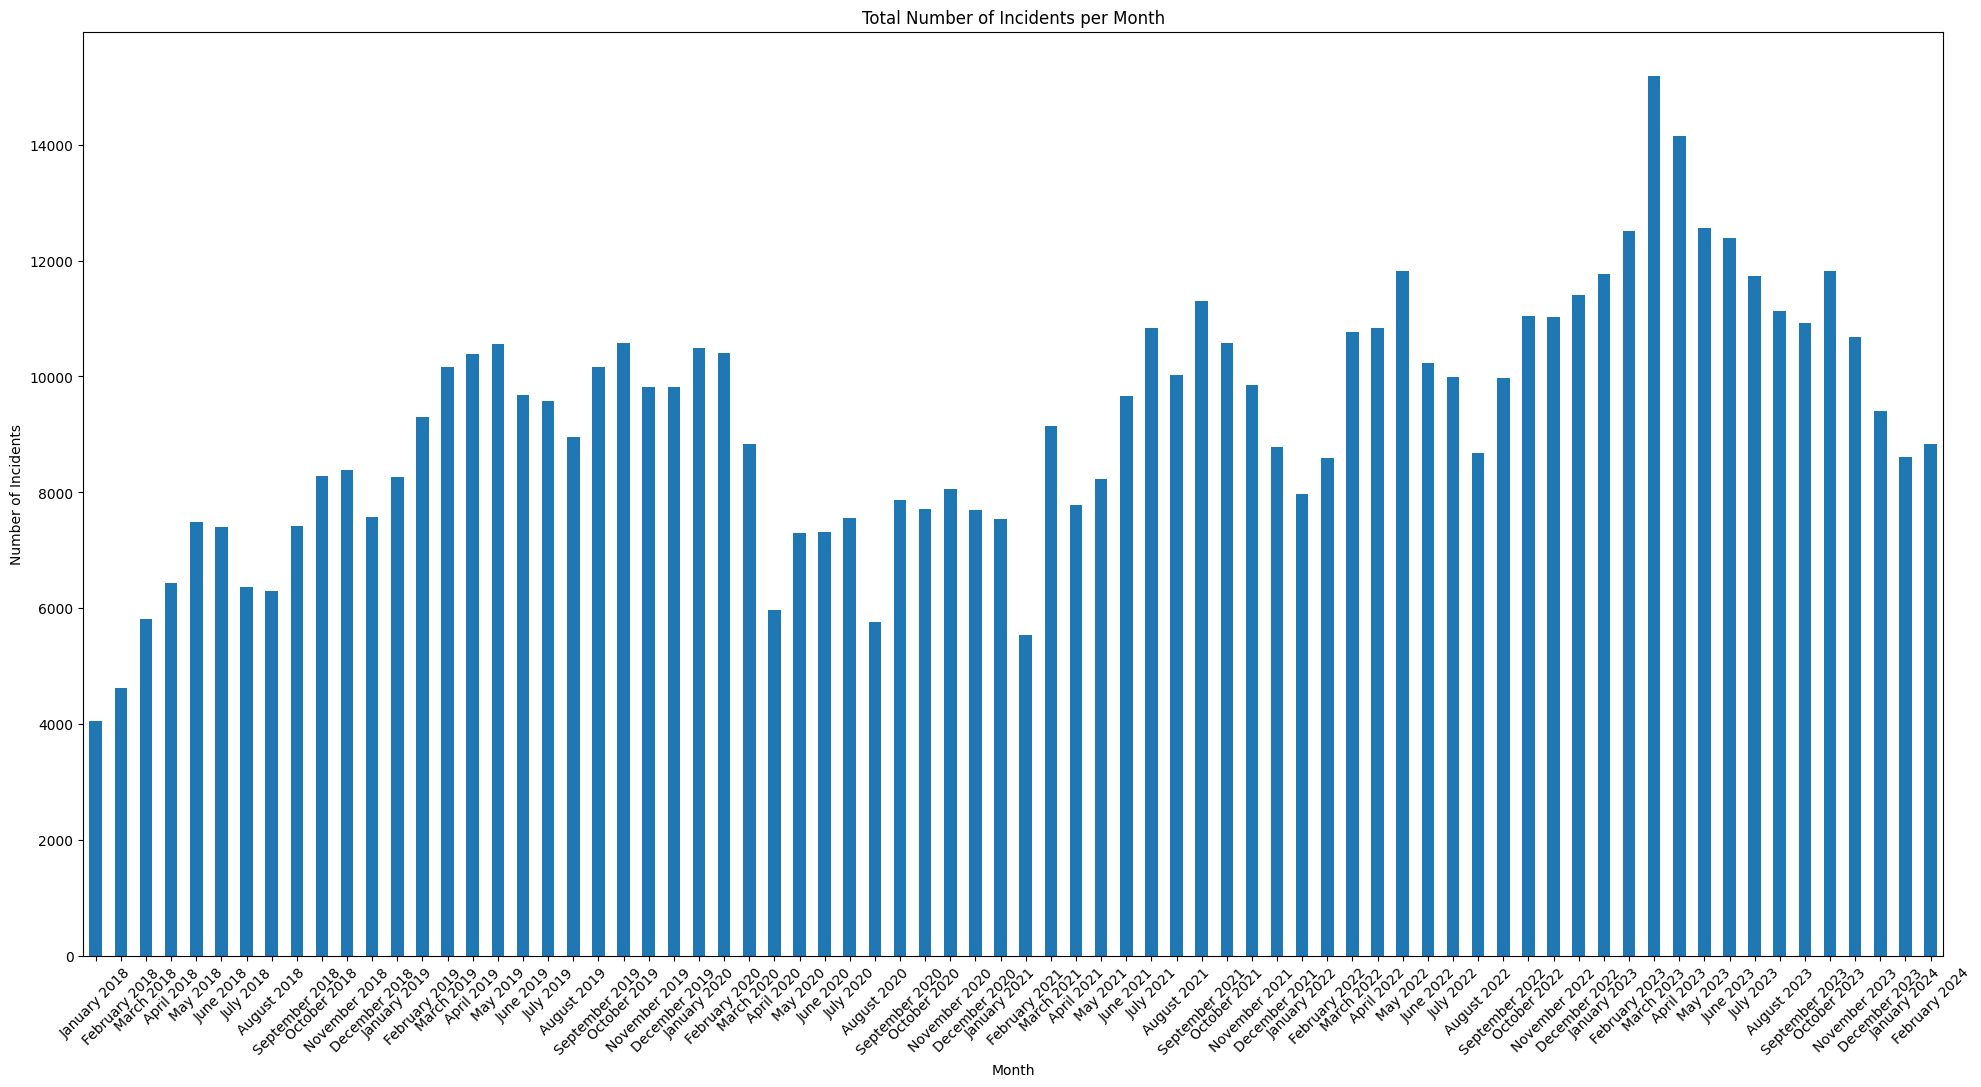

In [33]:
# Convert index to datetime
df.index = pd.to_datetime(df.index)

# Group by month and count the number of incidents in each month
incidents_per_month = df.resample('ME').size()

# Extract month from the index
incidents_per_month.index = incidents_per_month.index.strftime('%B %Y')

# Plot the result
incidents_per_month.plot(kind='bar', figsize=(24, 12))
plt.title('Total Number of Incidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()

#### Normalization of data

In [34]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=['category', 'place_name'])
print(df)

              eventid  duration_seconds  latitude  longitude  maxwaarde  \
date                                                                      
2024-02-29  132356402               1.0  51.57375   4.840390          1   
2024-02-29  132299107               6.0  51.57566   4.762240         44   
2024-02-29  132333651               1.4  51.59363   4.821770          0   
2024-02-29  132266421               1.6  51.57880   4.715170          0   
2024-02-29  132318262              35.0  51.57172   4.761157         74   
...               ...               ...       ...        ...        ...   
2018-01-01    5408938               2.2  51.58175   4.826783          0   
2018-01-01    5356711               8.0  51.59325   4.826899         67   
2018-01-01    5965664              22.9  51.58698   4.697569         78   
2018-01-01    5866239              17.0  51.57177   4.761276         65   
2018-01-01    5618085               1.7  51.59370   4.821939          0   

           incident_seve

In [35]:
# Define the mapping of original categories to encoded values
mapping = {'low risk': 0, 'medium risk': 1, 'high risk': 2}

# Create a new column with the encoded values
df['risk_category_encoded'] = df['risk_category'].map(mapping)

# Display the updated DataFrame
print(df[['risk_category', 'risk_category_encoded']])

           risk_category  risk_category_encoded
date                                           
2024-02-29      low risk                      0
2024-02-29      low risk                      0
2024-02-29      low risk                      0
2024-02-29      low risk                      0
2024-02-29      low risk                      0
...                  ...                    ...
2018-01-01     high risk                      2
2018-01-01     high risk                      2
2018-01-01     high risk                      2
2018-01-01     high risk                      2
2018-01-01     high risk                      2

[685604 rows x 2 columns]


In [36]:
df.reset_index(inplace=True)
df.rename(columns={'index': 'date'}, inplace=True)  # Ensures the date column is named and treated correctly
df.to_sql('ANWB_data', engine, schema='group18_warehouse', if_exists='replace', index=False)

# Define the schema where you want to store the table
schema = 'group18_warehouse'
 
# Convert DataFrame to SQL table
df.to_sql('ANWB_data', engine, schema='group18_warehouse', if_exists='replace', index=False)
 
# Close the connection
engine.dispose()

## Open-Meteo dataset

### Introduction to the Weather Data Set

This weather dataset contains meteorological data spanning from January 1, 2015, to May 1, 2024. The data was sourced from the Open-Meteo API and includes various weather parameters recorded at a specific location with latitude 51.5904 and longitude 4.7936 (Breda). The dataset is structured to provide insights into weather patterns and trends over nearly a decade.

#### Data Fields

1. **time**: Timestamp of the recorded data, indicating the specific date and hour of observation. This column is crucial for temporal analysis and trend detection.
   
2. **temperature_2m (°C)**: Temperature measured at a height of 2 meters above ground level, expressed in degrees Celsius. This field helps in understanding the daily and seasonal temperature variations.

3. **rain (mm)**: The amount of rainfall recorded, expressed in millimeters.

4. **snowfall (cm)**: The amount of snowfall recorded, expressed in centimeters.

5. **snow_depth (m)**: The depth of snow on the ground, expressed in meters.

6. **weather_code (wmo code)**: The weather condition code according to the World Meteorological Organization (WMO) standards. This code provides standardized information about the observed weather conditions, such as clear skies, fog, drizzle, rain, snow, and thunderstorms.

WMO weather codes are numeric and correspond to specific weather conditions.

0: Clear sky

1: Mainly clear, a few clouds

2: Partly cloudy

3: Overcast

45: Fog

51: Light drizzle

53: Moderate drizzle

55: Heavy drizzle

61: Light rain

63: Moderate rain

65: Heavy rain

71: Light snow

73: Moderate snow

75: Heavy snow

95: Thunderstorm, slight or moderate

97: Thunderstorm with hail

Using WMO Weather Codes
These codes can be useful for adding another dimension to your risk level analysis.

#### Risk Level

Low Risk: Total intensity less than 0.4 cm (4 mm of rain or snow).

Medium Risk: Total intensity between 0.4 cm and 1.25 cm (4 mm to 12.5 mm of rain or snow).

High Risk: Total intensity greater than 1.25 cm (12.5 mm of rain or snow).

#### Data Source

The dataset was retrieved using the [Open-Meteo API](https://open-meteo.com/en/docs/historical-weather-api#latitude=51.5904&longitude=4.7936&hourly=temperature_2m,rain,snowfall,snow_depth,weather_code&timezone=auto), a reliable source for historical weather data.

In [37]:
# Display the DataFrame
print(df_api.head())
df_api.info()

                     temperature_2m  rain  snowfall  snow_depth  weather_code
time                                                                         
2018-08-15 00:00:00            17.7   0.0       0.0         0.0             3
2018-08-15 01:00:00            17.5   0.0       0.0         0.0             3
2018-08-15 02:00:00            17.2   0.0       0.0         0.0             2
2018-08-15 03:00:00            17.1   0.0       0.0         0.0             3
2018-08-15 04:00:00            17.2   0.0       0.0         0.0             2
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48600 entries, 2018-08-15 00:00:00 to 2024-02-29 23:00:00
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   temperature_2m  48600 non-null  float64
 1   rain            48600 non-null  float64
 2   snowfall        48600 non-null  float64
 3   snow_depth      48600 non-null  float64
 4   weather_code    48600 non-null  int6

In [38]:
# Aggregate data daily
daily_aggregated = df_api.resample('D').mean().reset_index()

# Verify the result
print(daily_aggregated.head())

        time  temperature_2m      rain  snowfall  snow_depth  weather_code
0 2018-08-15       19.425000  0.025000       0.0         0.0     12.458333
1 2018-08-16       19.683333  0.008333       0.0         0.0      5.333333
2 2018-08-17       18.229167  0.354167       0.0         0.0     19.291667
3 2018-08-18       17.583333  0.012500       0.0         0.0      5.333333
4 2018-08-19       18.916667  0.000000       0.0         0.0      1.875000


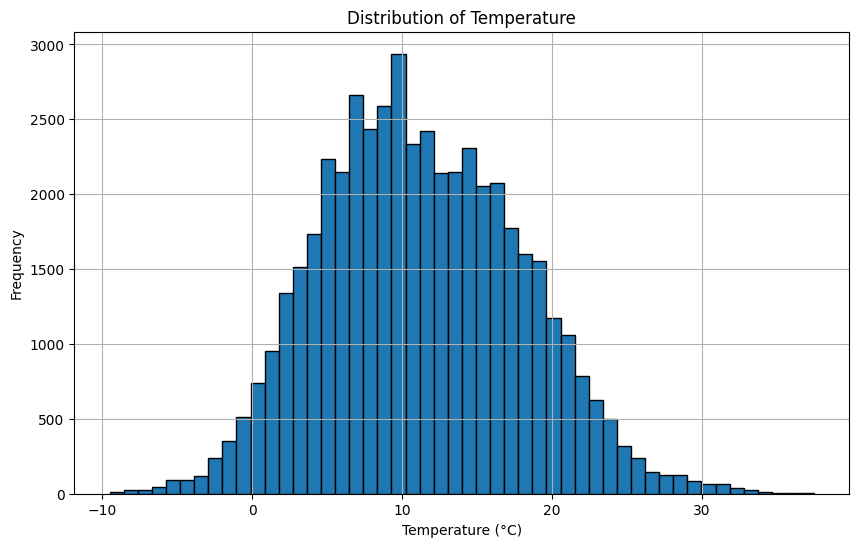

In [39]:
# Distribution of temperature
plt.figure(figsize=(10, 6))
plt.hist(df_api['temperature_2m'], bins=50, edgecolor='k')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

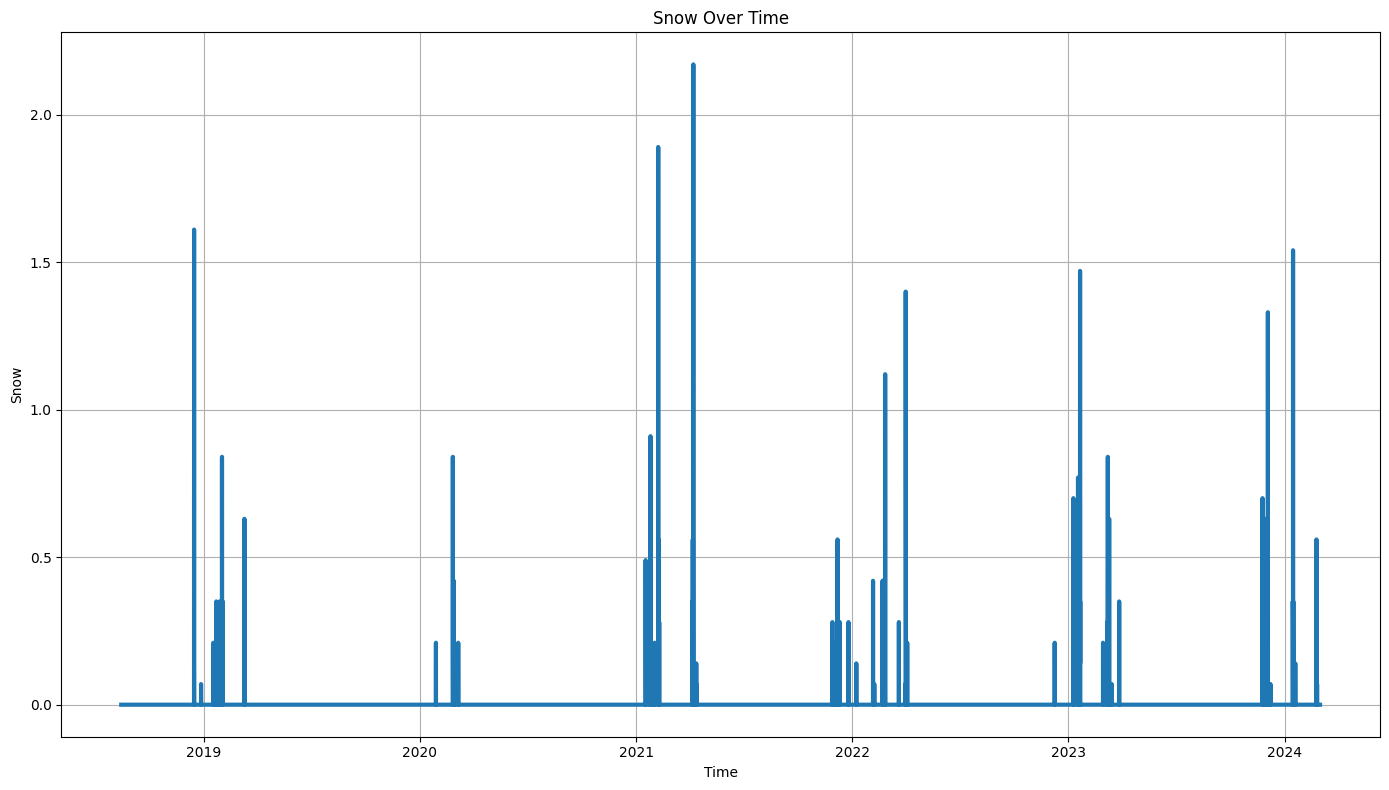

In [40]:
plt.figure(figsize=(14, 8))
plt.plot(df_api.index, df_api['snowfall'], linestyle='-', linewidth=3)
plt.title('Snow Over Time')
plt.xlabel('Time')
plt.ylabel('Snow')
plt.grid(True)
plt.tight_layout()
plt.show()

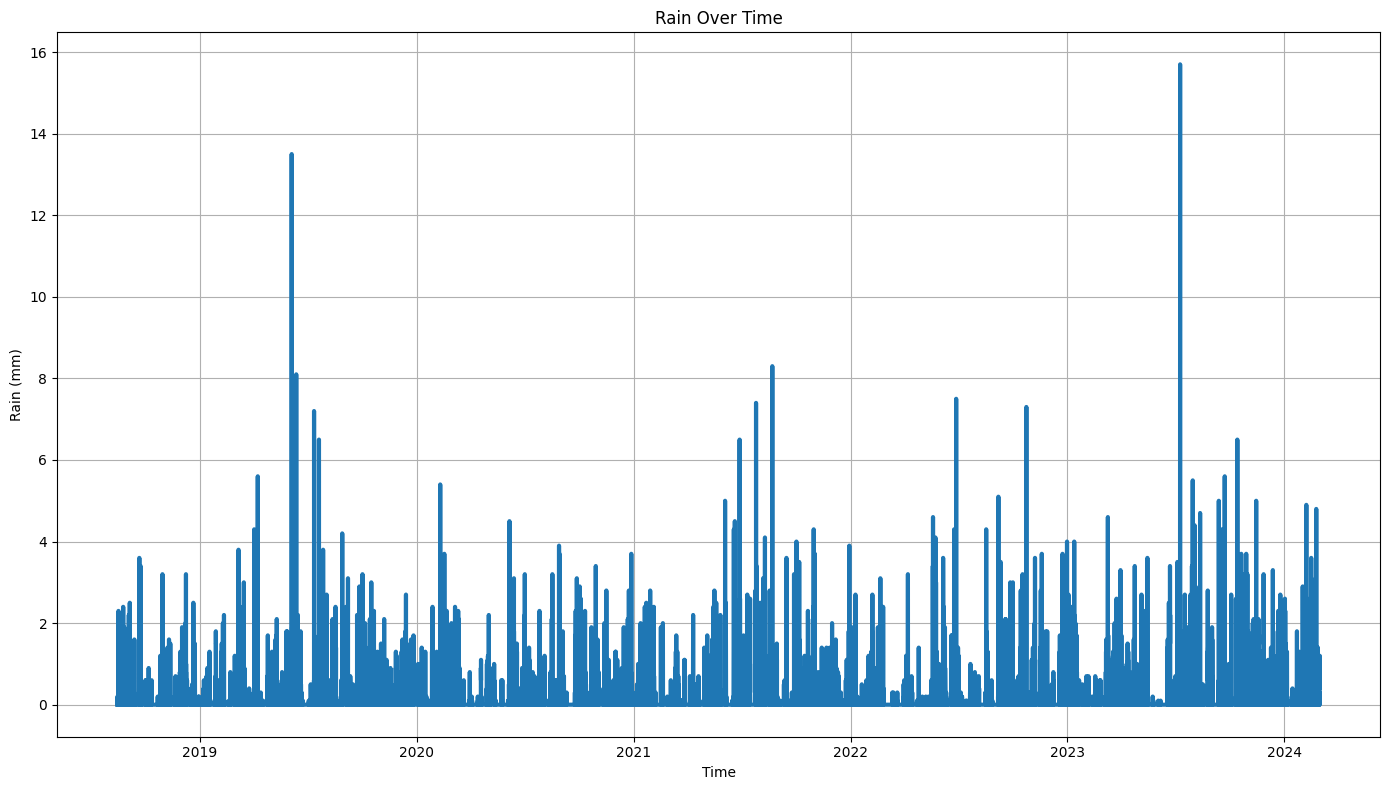

In [41]:
plt.figure(figsize=(14, 8))
plt.plot(df_api.index, df_api['rain'], linestyle='-', linewidth=3)
plt.title('Rain Over Time')
plt.xlabel('Time')
plt.ylabel('Rain (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

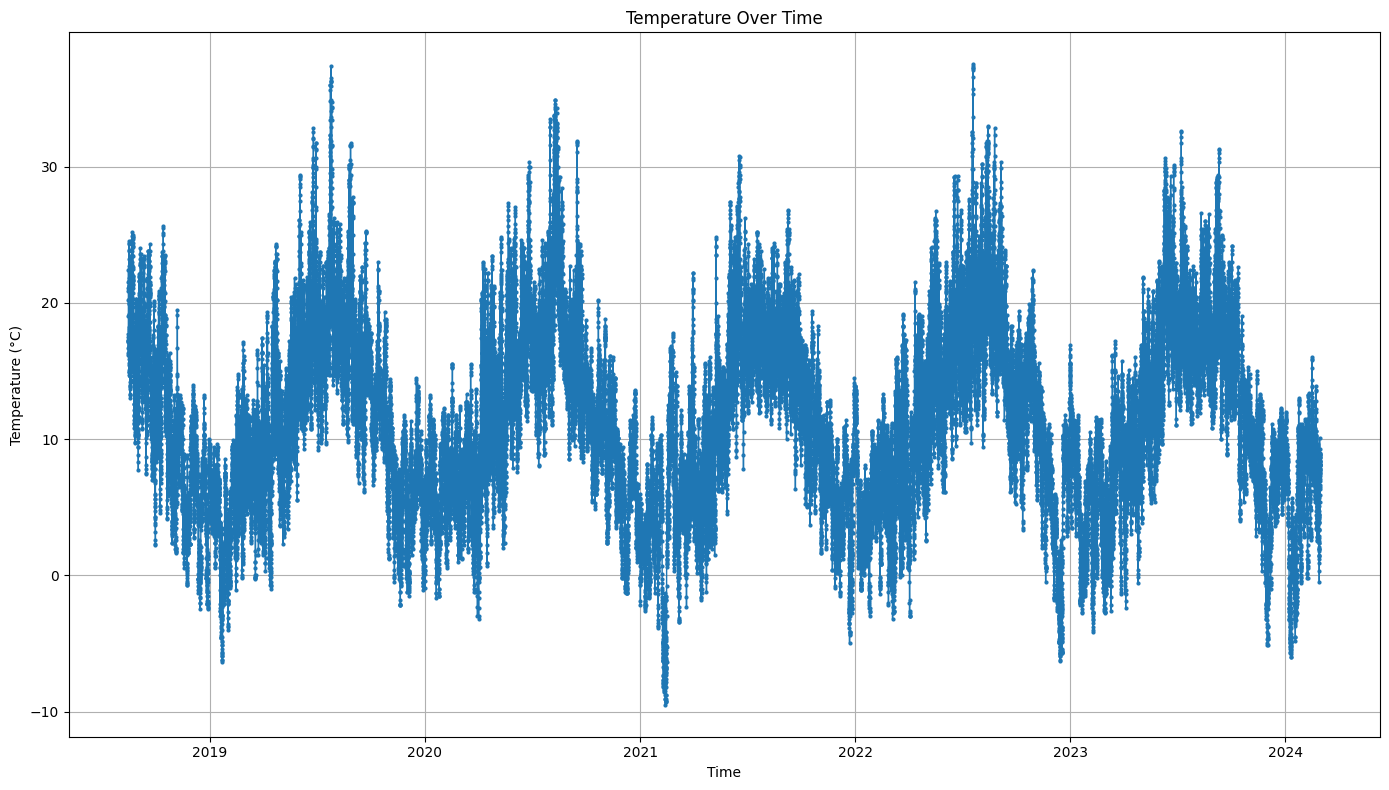

In [42]:
plt.figure(figsize=(14, 8))
plt.plot(df_api.index, df_api['temperature_2m'], marker='o', linestyle='-', markersize=2, linewidth=1)
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

Defines the function to determine the risk level based on WMO weather codes.

Applies this function to create a new risk level column based on weather codes.

In [43]:
def determine_risk_wmo(weather_code):
    high_risk_codes = [95, 97]  # Thunderstorm codes
    if weather_code in high_risk_codes:
        return 2
    elif weather_code in [61, 63, 65, 71, 73, 75, 45, 51, 53, 55]:  # Moderate risk weather conditions
        return 1
    else:
        return 0

# Apply the function to determine the risk level based on WMO weather codes
df_api['risk_level_wmo'] = df_api['weather_code'].apply(determine_risk_wmo)

# Print the DataFrame with the new column
print(df_api[['weather_code', 'risk_level_wmo']])

                     weather_code  risk_level_wmo
time                                             
2018-08-15 00:00:00             3               0
2018-08-15 01:00:00             3               0
2018-08-15 02:00:00             2               0
2018-08-15 03:00:00             3               0
2018-08-15 04:00:00             2               0
...                           ...             ...
2024-02-29 19:00:00            53               1
2024-02-29 20:00:00            51               1
2024-02-29 21:00:00            53               1
2024-02-29 22:00:00            53               1
2024-02-29 23:00:00            53               1

[48600 rows x 2 columns]


In [44]:
conn_string = f"postgresql+psycopg2://{db_params['user']}:{db_params['password']}@{db_params['host']}:{db_params['port']}/{db_params['database']}"

# Create SQLAlchemy engine
engine = create_engine(conn_string)

# Define the schema where you want to store the table
schema = 'group18_warehouse'

# Convert DataFrame to SQL table
# Ensure df_api is your DataFrame containing the weather data and risk levels
df_api.reset_index(inplace=True)  # Reset the index to include 'time' in the table
df_api.to_sql('weather_risk_data', engine, schema=schema, if_exists='replace', index=False)

# Close the connection
engine.dispose()

In [45]:
print(df_api.describe())

                      time  temperature_2m          rain      snowfall  \
count                48600    48600.000000  48600.000000  48600.000000   
mean   2021-05-23 11:30:00       11.277056      0.097461      0.001806   
min    2018-08-15 00:00:00       -9.500000      0.000000      0.000000   
25%    2020-01-03 05:45:00        6.400000      0.000000      0.000000   
50%    2021-05-23 11:30:00       10.800000      0.000000      0.000000   
75%    2022-10-11 17:15:00       16.000000      0.000000      0.000000   
max    2024-02-29 23:00:00       37.500000     15.700000      2.170000   
std                    NaN        6.657822      0.363864      0.034492   

         snow_depth  weather_code  risk_level_wmo  
count  48600.000000  48600.000000    48600.000000  
mean       0.000942     12.099835        0.207160  
min        0.000000      0.000000        0.000000  
25%        0.000000      1.000000        0.000000  
50%        0.000000      2.000000        0.000000  
75%        0.000000  

In [46]:
print(df_api.head())

                 time  temperature_2m  rain  snowfall  snow_depth  \
0 2018-08-15 00:00:00            17.7   0.0       0.0         0.0   
1 2018-08-15 01:00:00            17.5   0.0       0.0         0.0   
2 2018-08-15 02:00:00            17.2   0.0       0.0         0.0   
3 2018-08-15 03:00:00            17.1   0.0       0.0         0.0   
4 2018-08-15 04:00:00            17.2   0.0       0.0         0.0   

   weather_code  risk_level_wmo  
0             3               0  
1             3               0  
2             2               0  
3             3               0  
4             2               0  


### Task 5.4 - Advanced Pre-processing of Data

Please provide the relevant code for joining datasets and performing advanced data preprocessing. Refer to the **good** criterion explanation for a better understanding of the steps to consider for this criterion. This evidence corresponds to the **good** criterion.

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

In [47]:
engine = create_engine(conn_string)

# SQL Query to get table names from the schema
sql_query = text("""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'group18_warehouse';
""")

# Execute the SQL query
with engine.connect() as connection:
    result = connection.execute(sql_query)

# Fetch
tables = result.fetchall()

# Convert to df
df_tables = pd.DataFrame(tables, columns=['table_name'])

# Display df
print(df_tables)

# Close the connection
engine.dispose()

          table_name
0          rain_data
1  weather_risk_data
2          ANWB_data


### Jason's code
engine = create_engine(conn_string)

### SQL Query to get table names from the schema
sql_query = text("""

select extract('year' from wrd."time") as year,

wrd.risk_level_WMO,

ad.risk_category_encoded,

count(ad.*)

from group18_warehouse.weather_risk_data wrd

left join group18_warehouse."ANWB_data" ad

on date(wrd."time") = ad."date"

group by 1,2,3
 

select * from group18_warehouse.weather_risk_data wrd

where weather_code = 61;

""")

### Execute the SQL query
with engine.connect() as connection:

    result = connection.execute(sql_query)

### Fetch
tables = result.fetchall()

### Close the connection
engine.dispose()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685604 entries, 0 to 685603
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      685604 non-null  datetime64[ns]
 1   eventid                   685604 non-null  int64         
 2   duration_seconds          685604 non-null  float64       
 3   latitude                  685604 non-null  float64       
 4   longitude                 685604 non-null  float64       
 5   maxwaarde                 685604 non-null  int64         
 6   incident_severity         685604 non-null  object        
 7   road_segment_id           685604 non-null  int64         
 8   road_manager_type         685604 non-null  object        
 9   road_number               685604 non-null  object        
 10  road_name                 685604 non-null  object        
 11  avg_speed                 685604 non-null  int64         
 12  ri

In [52]:
engine = create_engine(conn_string)

# Prepared SQL query
sql_query = text("""
SELECT column_name
FROM information_schema.columns
WHERE table_schema = 'group18_warehouse' AND table_name = 'ANWB_data';
""")

# Execute the query and fetch the data
with engine.connect() as connection:
    result = connection.execute(sql_query)
    rows = result.fetchall()

# Convert fetched data to df
df_columns = pd.DataFrame(rows, columns=['column_name'])

# Display the df
print(df_columns)

# Dispose the engine
engine.dispose()

                 column_name
0                       date
1                    eventid
2           duration_seconds
3                   latitude
4                  longitude
5                  maxwaarde
6          incident_severity
7            road_segment_id
8          road_manager_type
9                road_number
10                 road_name
11                 avg_speed
12             risk_category
13               is_speeding
14       is_outlier_duration
15     category_ACCELERATING
16          category_BRAKING
17  category_HARSH CORNERING
18            category_SPEED
19          place_name_Bavel
20          place_name_Breda
21    place_name_Prinsenbeek
22     place_name_Teteringen
23      place_name_Ulvenhout
24     risk_category_encoded


In [53]:
engine = create_engine(conn_string)

# Prepared SQL query
sql_query = text("""
SELECT 
    a."date", a."eventid", a."latitude", a."longitude", a."duration_seconds", a."maxwaarde", a."incident_severity",
    a."road_segment_id", a."road_manager_type", a."road_number", a."road_name", a."avg_speed",
    a."risk_category", a."is_speeding", a."is_outlier_duration",
    a."place_name_Bavel", a."place_name_Breda", a."place_name_Prinsenbeek",
    a."place_name_Teteringen", a."place_name_Ulvenhout", a."risk_category_encoded",
    b."temperature_2m", b."rain", b."snowfall", b."snow_depth", b."weather_code", b."risk_level_wmo"
FROM 
    group18_warehouse."ANWB_data" AS a
JOIN 
    group18_warehouse."weather_risk_data" AS b
ON 
    a."date" = b."time";
""")

# Execute the query and fetch the data
with engine.connect() as connection:
    result = connection.execute(sql_query)
    rows = result.fetchall()

# Columns must match the SELECT
columns = [
    'date', 'eventid', 'latitude', 'longitude', 'duration_seconds', 'maxwaarde', 'incident_severity',
    'road_segment_id', 'road_manager_type', 'road_number', 'road_name', 'avg_speed',
    'risk_category', 'is_speeding', 'is_outlier_duration',
    'place_name_Bavel', 'place_name_Breda', 'place_name_Prinsenbeek',
    'place_name_Teteringen', 'place_name_Ulvenhout', 'risk_category_encoded',
    'temperature_2m', 'rain', 'snowfall', 'snow_depth', 'weather_code', 'risk_level_wmo'
]

# Create a df from the fetched data
df_joined = pd.DataFrame(rows, columns=columns)

# Print the first rows of the DataFrame 
print(df_joined.head())

# Dispose the engine when done
engine.dispose()

        date    eventid  latitude  longitude  duration_seconds  maxwaarde  \
0 2024-02-29  132356402  51.57375   4.840390               1.0          1   
1 2024-02-29  132299107  51.57566   4.762240               6.0         44   
2 2024-02-29  132333651  51.59363   4.821770               1.4          0   
3 2024-02-29  132266421  51.57880   4.715170               1.6          0   
4 2024-02-29  132318262  51.57172   4.761157              35.0         74   

  incident_severity  road_segment_id road_manager_type road_number  ...  \
0               HB1        233197001                 G              ...   
1               SP1        222197067                 G              ...   
2               HC1        231201061                 G              ...   
3               HC1        216198026                 G              ...   
4               SP1        600751227                 G              ...   

  place_name_Prinsenbeek  place_name_Teteringen place_name_Ulvenhout  \
0             

In [54]:
print(df_joined['road_name'])

0                Tervoortseweg
1                   Langendijk
2                 Tilburgseweg
3                  Ettensebaan
4          Graaf Engelbertlaan
                  ...         
640675        Charles Petitweg
640676       Rat Verleghstraat
640677    Claudius Prinsenlaan
640678            Emerparklaan
640679               Langelaar
Name: road_name, Length: 640680, dtype: object


### Task 5.5 - Final Data Preparation

Please provide evidence of the techniques used to balance the class distribution and normalize the target variable, if applicable. This corresponds to the first part of the **Excellent** criterion.  

__Important!__ Do __NOT__ include usernames or passwords in plain text in your submission. 
You can replace them with Environment Variables, Placeholders, etc.

Please provide a link to a PDF file in the following cell. This PDF should explain all the preprocessing steps and configurations used to prepare the data before proceeding to the modeling phase of the project. In addition, the PDF should include a schema diagram of your data warehouse this corresponds with the **Excellent** criterion.

[PRE-PROCESSING STEPS](https://github.com/BredaUniversityADSAI/2023-24d-fai1-adsai-teamwork-t18/blob/main/Improve%20the%20safety%20in%20Breda%20-%20Preprocessing%20file.pdf)

## ILO 6.0: Modelling, Evaluation, and Iteration

### Task 6.1 - Modelling

Please provide a link to a file in the following cell, which clarifies the individual contributions of all your team members. This is the first part of the evidences for the **poor** criterion. 

[MEMBER CONTRIBUTION](https://github.com/BredaUniversityADSAI/2023-24d-fai1-adsai-teamwork-t18/blob/main/Improve%20the%20safety%20in%20Breda%20-%20Feedback%20file.pdf)

## Decision Trees

### Iteration 1

### Task 5.5 Final pre-processing steps

In [55]:
# Define features and target variable
features = ['duration_seconds', 'maxwaarde', 
            'temperature_2m', 'rain', 'snowfall', 'snow_depth', 'weather_code']
target = 'risk_category_encoded'

X = df_joined[features]
y = df_joined[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Task 6.1 - Modelling

In [56]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Task 6.2 - Evaluation

In [57]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7403904185136626
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.80      0.77     99056
           1       0.22      0.21      0.21      7057
           2       0.78      0.72      0.75     86091

    accuracy                           0.74    192204
   macro avg       0.58      0.57      0.58    192204
weighted avg       0.74      0.74      0.74    192204

Confusion Matrix:
[[79007  3651 16398]
 [ 4327  1463  1267]
 [22763  1492 61836]]


Text(0.5, 23.52222222222222, 'Predicted values')

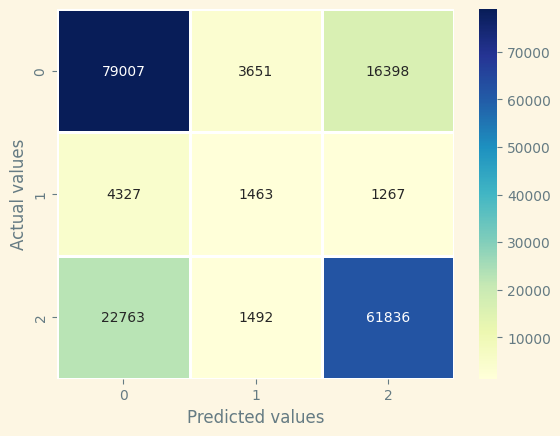

In [58]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', linewidths=2)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')

COMMENTARY

### Task 6.3 - Iteration

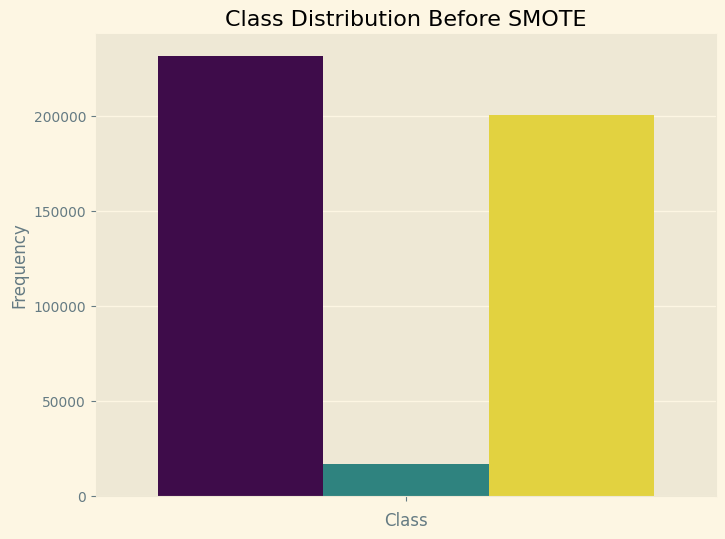

In [59]:
# Plot class distribution of the original training set
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(hue=classes, y=counts, palette='viridis', legend=False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot the class distribution before SMOTE
plot_class_distribution(y_train, 'Class Distribution Before SMOTE')

### Iteration 2

### Task 5.5 - Final pre-processing steps

In [60]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

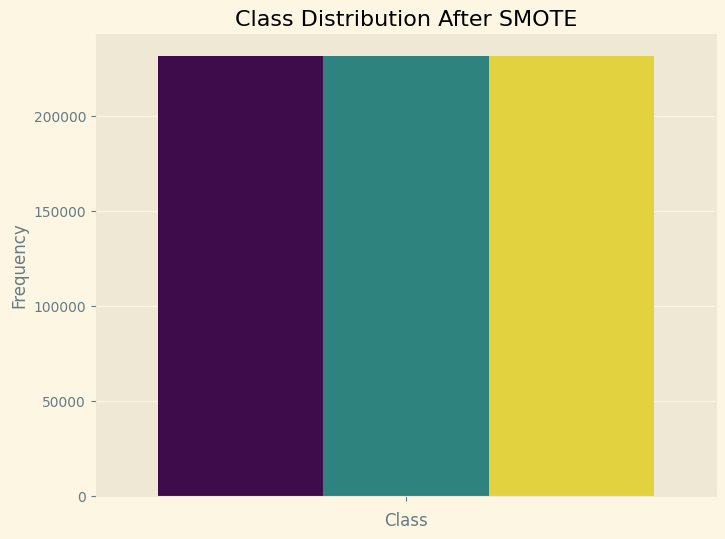

In [61]:
# Plot class distribution of the resampled training set
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(hue=classes, y=counts, palette='viridis', legend = False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot the class distribution after SMOTE
plot_class_distribution(y_train_smote, 'Class Distribution After SMOTE')

### Task 6.1 - Modelling

In [62]:
# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the decision tree classifier on the resampled data
clf.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

### Task 6.2 - Evaluation

In [63]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.7125918295144742
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75     99056
           1       0.19      0.25      0.22      7057
           2       0.74      0.69      0.72     86091

    accuracy                           0.71    192204
   macro avg       0.56      0.57      0.56    192204
weighted avg       0.72      0.71      0.72    192204



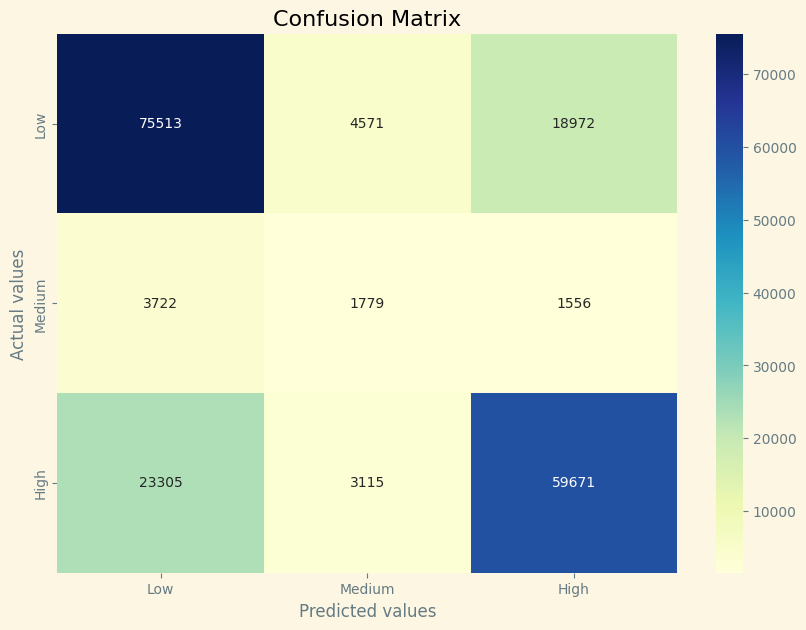

In [66]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

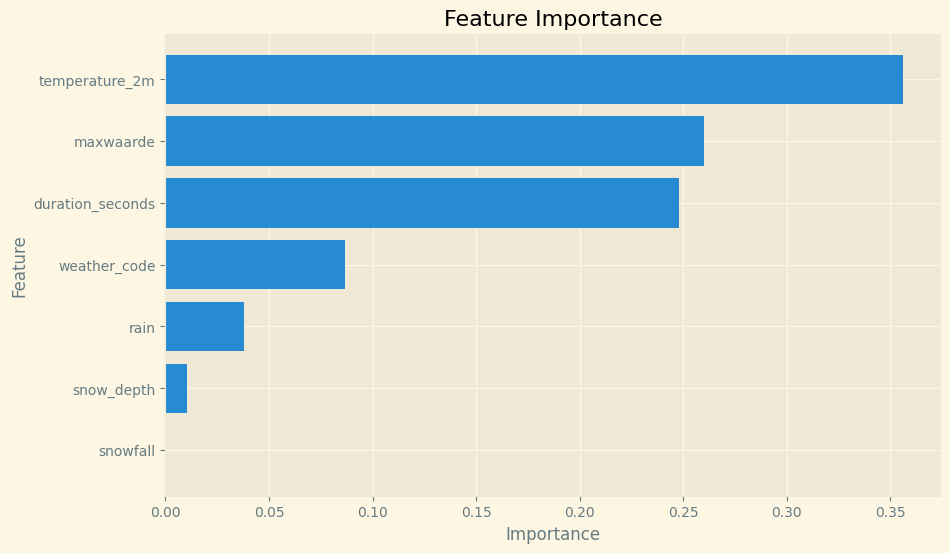

In [78]:
# Get feature importance
importances = clf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [71]:
from lime import lime_tabular

# Assuming you have a trained decision tree model named `decision_tree`
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=[str(cls) for cls in y_train.unique()], 
                                              mode='classification')

# Explain a single prediction
i = 0  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], clf.predict_proba)
exp.show_in_notebook(show_all=False)


In [72]:
from lime import lime_tabular

# Assuming you have a trained decision tree model named `decision_tree`
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=[str(cls) for cls in y_train.unique()], 
                                              mode='classification')

# Explain a single prediction
i = 1  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], clf.predict_proba)
exp.show_in_notebook(show_all=False)


In [75]:
from lime import lime_tabular

# Assuming you have a trained decision tree model named `decision_tree`
explainer = lime_tabular.LimeTabularExplainer(training_data=X_train.values, 
                                              feature_names=X_train.columns, 
                                              class_names=[str(cls) for cls in y_train.unique()], 
                                              mode='classification')

# Explain a single prediction
i = 4  # index of the instance to be explained
exp = explainer.explain_instance(X_test.values[i], clf.predict_proba)
exp.show_in_notebook(show_all=False)


### Task 6.3 - Iteration

### Iteration 3

### Task 6.1 -  Modelling

In [ ]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 2, 5, 10, 20, 30, 40, 50],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best estimator
best_clf = grid_search.best_estimator_

Fitting 5 folds for each of 6336 candidates, totalling 31680 fits


### Task 6.2 - Evaluation

In [ ]:
# Make predictions with the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.title('Confusion Matrix')
plt.show()

---

## Random Forest

### Iteration 1

### Task 5.5 - Final pre-processing steps

In [ ]:
# Data preparation
df_selected = df_joined[['road_name', 'risk_category_encoded', 'weather_code', 'risk_level_wmo']].copy()
incident_counts = df_selected.groupby('road_name').size().reset_index(name='incident_count')
df_selected = df_selected.merge(incident_counts, on='road_name', how='left')

# Encoding categorical variables
encoder = LabelEncoder()
df_selected['road_name'] = encoder.fit_transform(df_selected['road_name'].astype(str))

# Preparing X and target y
X = df_selected[['road_name', 'weather_code', 'risk_level_wmo', 'incident_count']]  # Features
y = df_selected['risk_category_encoded']  # Target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Plot class distribution of the original training set
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(hue=classes, y=counts, palette='viridis', legend=False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot the class distribution before SMOTE
plot_class_distribution(y_train, 'Class Distribution Before SMOTE')

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Plot class distribution of the resampled training set
def plot_class_distribution(y, title):
    counter = Counter(y)
    classes = list(counter.keys())
    counts = list(counter.values())

    plt.figure(figsize=(8, 6))
    sns.barplot(hue=classes, y=counts, palette='viridis', legend = False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.show()

# Plot the class distribution after SMOTE
plot_class_distribution(y_train_resampled, 'Class Distribution After SMOTE')

### Task 6.1 - Modelling

In [ ]:
# Train RandomForest for risk level classification
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

### Task 6.2 - Evaluation

In [ ]:
# Predict and evaluate on test data
y_pred_test_rf = rf.predict(X_test)
print("RandomForest Test Accuracy for Risk Level Classification:", accuracy_score(y_test, y_pred_test_rf))
print("RandomForest Test Classification Report for Risk Level Classification:\n", classification_report(y_test, y_pred_test_rf))

In [ ]:
mse = mean_squared_error(y_test, y_pred_test_rf)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred_test_rf)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R squared:", r2)

In [ ]:
# Cross Validation
rf_res = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=5) # 5-fold cross-validation

print("Accuracy for each fold for 5-fold cross-validation:", np.mean(np.abs(cv_scores))) # accuracy for each fold
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Function to plot feature importance
def plot_feature_importance(model, features, title):
    importance = model.feature_importances_
    indices = np.argsort(importance)

    plt.figure(figsize=(10, 8))
    plt.title(title)
    plt.barh(range(len(indices)), importance[indices], align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

# Plot confusion matrix for RandomForest (risk level classification)
plot_confusion_matrix(y_test, y_pred_test_rf, 'RandomForest Test Confusion Matrix for Risk Level Classification')

# Plot feature importance for RandomForest (risk level classification)
plot_feature_importance(rf, X.columns, 'RandomForest Feature Importance for Risk Level Classification')

# Predict risk level for all road names
df_selected['predicted_risk_level'] = rf.predict(X)

# Decode road names back to original
df_selected['road_name'] = encoder.inverse_transform(df_selected['road_name'])

# Group by road name to determine the most frequent risk level
road_risk_levels = df_selected.groupby('road_name')['predicted_risk_level'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Ensure risk levels are 0, 1, or 2
road_risk_levels['assigned_risk_level'] = road_risk_levels['predicted_risk_level'].apply(lambda x: max(0, min(2, x)))

# Display roads with risk levels 1 or 2
roads_with_risk_1_or_2 = road_risk_levels[road_risk_levels['assigned_risk_level'].isin([1, 2])]
print("Roads with Risk Levels 1 or 2:\n", roads_with_risk_1_or_2)

---

### Task 6.3 - Iteration

### Iteration 2

### Task 5.5 - Final pre-processing steps

In [ ]:
# Calculate the total number of incidents per road
incident_counts = df['road_name'].value_counts().reset_index()
incident_counts.columns = ['road_name', 'total_incidents']

# Calculate the counts of each type of incident per road
incident_types_per_road = df.groupby(['road_name', 'incident_severity']).size().unstack(fill_value=0).reset_index()

# Merge incident counts and types
road_incident_data = pd.merge(incident_counts, incident_types_per_road, on='road_name')

# Define weights for severity
severity_weights = {
    'HA1': 1, 'HB1': 1, 'HC1': 1, 'HC2': 1, 'HC3': 1, 'HC4': 1, 'HC5': 1, 'SP1': 1,
    'HA2': 2, 'HA3': 2, 'HB2': 2, 'HB3': 2, 'HC6': 2, 'HC7': 2, 'HC8': 2, 'HC10': 2, 'HC13': 2, 'HC14': 2, 'HC11': 2, 'SP2': 2, 'SP3': 2,
    'HC15': 3, 'HC16': 3, 'HC17': 3, 'HC18': 3, 'HC19': 3, 'HC20': 3, 'HC21': 3, 'SP4': 3, 'SP5': 3
}

# Assign weights to incident types based on severity levels
for severity, weight in severity_weights.items():
    if severity in road_incident_data.columns:
        road_incident_data[f"{severity}_weighted"] = road_incident_data[severity] * weight

# Calculate a weighted severity score
incident_columns = [col for col in road_incident_data.columns if 'weighted' in col]
road_incident_data['severity_score'] = road_incident_data[incident_columns].sum(axis=1)

# Define risk levels based on severity score
bins = [-float('inf'), 7000, 34000, float('inf')]
labels = ['low', 'mid', 'high']
road_incident_data['risk_level'] = pd.cut(road_incident_data['severity_score'], bins=bins, labels=labels)

# Display the dataframe
print(road_incident_data.head())

In [ ]:
# Prepare features and labels
X = road_incident_data.drop(columns=['road_name', 'total_incidents', 'risk_level', 'severity_score', 'HA1', 'HB1', 'HC1', 'HC2', 'HC3', 'HC4', 'HC5', 'SP1',
    'HA2', 'HA3', 'HB2', 'HB3', 'HC6', 'HC7', 'HC8', 'HC10', 'HC13', 'HC14', 'SP2', 'SP3',
    'HC15', 'HC16', 'HC17', 'HC19', 'SP4', 'SP5'])

y = road_incident_data['risk_level']


# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(road_incident_data.head())

### Task 6.1 - Modelling

In [ ]:
# Train a RandomForest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

### Task 6.2 - Evaluation

In [ ]:
y_pred_test_rf = rf.predict(X_test)

print("RandomForest Test Accuracy for Risk Level Classification:", accuracy_score(y_test, y_pred_test_rf))
print("RandomForest Test Classification Report for Risk Level Classification:\n", classification_report(y_test, y_pred_test_rf))

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred_test_rf, 'RandomForest with Feature Weights Confusion Matrix')

In [ ]:
# Cross Validation
rf_res = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5) # 5-fold cross-validation

print("Accuracy for each fold for 5-fold cross-validation:", np.mean(np.abs(cv_scores))) # accuracy for each fold
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

In [ ]:
low_risk_roads = road_incident_data[road_incident_data['risk_level'] == 'low']
print(low_risk_roads)

In [ ]:
mid_risk_roads = road_incident_data[road_incident_data['risk_level'] == 'mid']
print(mid_risk_roads)

In [ ]:
high_risk_roads = road_incident_data[road_incident_data['risk_level'] == 'high']
print(high_risk_roads)

---

### Task 6.3 - Iteration

### Iteration 3

### Task 5.5 - Final pre-processing steps 

In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
# Split the resampled dataset
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

### Task 6.1 - Modelling

In [ ]:
rf_res = RandomForestClassifier(random_state=42)

# Train the RandomForest model on the resampled dataset
rf_res.fit(X_train_res, y_train_res)

### Task 6.2 - Evaluation

In [ ]:
# Predict and evaluate
y_pred_test_res_rf = rf_res.predict(X_test_res)
print("RandomForest Test Accuracy for Risk Level Classification:", accuracy_score(y_test_res, y_pred_test_res_rf))
print(classification_report(y_test_res, y_pred_test_res_rf))

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test_res, y_pred_test_res_rf, 'RandomForest Balanced Dataset Confusion Matrix')

In [ ]:
# Cross Validation
rf_res = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(rf_res, X_train_res, y_train_res, cv=5) # 5-fold cross-validation

print("Accuracy for each fold for 5-fold cross-validation:", np.mean(np.abs(cv_scores))) # accuracy for each fold
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

COMMENTARY

### Training time

In [ ]:
# Measure training time
start_time = time.time()

# Train the RandomForest model
rf_res.fit(X_train_res, y_train_res)

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

## XAI/ Interpretability

### Feature importance

In [ ]:
# Get feature importance
importances = rf_res.feature_importances_
feature_names = X_train_res.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

### LIME Plot

The LIME explanation plot provides insights into how the model made its prediction for a specific instance. The plot displays the prediction probabilities for each class and highlights the contributions of each feature to the model's prediction.

Features are listed along with their contributions to the prediction. The bars indicate how much each feature pushed the prediction towards a specific class.

In [ ]:
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="lime")

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_res.values,
    feature_names=X_train_res.columns,
    class_names=y_train_res.unique(),
    mode='classification'
)

# Define a function that accepts a data frame
def predict_fn(x):
    x_df = pd.DataFrame(x, columns=X_train_res.columns)
    return rf_res.predict_proba(x_df)

# Explain a prediction
i = 0                            # index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test_res.iloc[i],
    predict_fn=predict_fn
)

# Show explanation
exp.show_in_notebook(show_all=False)

In [ ]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_res.values,
    feature_names=X_train_res.columns,
    class_names=y_train_res.unique(),
    mode='classification'
)

# Define a function that accepts a data frame
def predict_fn(x):
    x_df = pd.DataFrame(x, columns=X_train_res.columns)
    return rf_res.predict_proba(x_df)

# Explain a prediction
i = 0                            # index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test_res.iloc[i],
    predict_fn=predict_fn
)

# Show explanation
exp.show_in_notebook(show_all=False)

In [ ]:
# Explain a prediction
i = 1  # index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test_res.iloc[i],
    predict_fn=predict_fn
)

# Show explanation
exp.show_in_notebook(show_all=False)

In [ ]:
# Explain a prediction
i = 1500 # index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_test_res.iloc[i],
    predict_fn=predict_fn
)

# Show explanation
exp.show_in_notebook(show_all=False)

COMMENTARY

## Task 6.5 - Complex Machine Learning Model

### Iteration 1

### Pre-processing

In [ ]:
df_selected = df_joined[['date', 'eventid', 'duration_seconds', 'road_name', 'maxwaarde',
                         'incident_severity', 'risk_category_encoded', 'weather_code', 'risk_level_wmo']].copy()

# Encoding categorical variables
encoder = LabelEncoder()
df_selected['incident_severity'] = encoder.fit_transform(df_selected['incident_severity'])
df_selected['road_name'] = encoder.fit_transform(df_selected['road_name'].astype(str))
df_selected['risk_level_wmo'] = encoder.fit_transform(df_selected['risk_level_wmo'])

# Extract relevant information from 'date'
df_selected['day_of_week'] = df_selected['date'].dt.dayofweek
df_selected['month'] = df_selected['date'].dt.month
df_selected['year'] = df_selected['date'].dt.year

# Drop the original 'date' column
df_selected.drop(columns=['date'], inplace=True)

# Selecting relevant features for this model
X = df_selected.drop(columns=['risk_category_encoded'])  # Features
y = df_selected['risk_category_encoded']  # Target

# One-hot encode the target variable
y_encoded = to_categorical(y)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Modelling

In [ ]:
# Build a DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Architectures of the model
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

### Evaluation

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n",conf_matrix)
print("Classification report:\n",class_report)

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test_classes, y_pred_classes, 'Neural Network Confusion Matrix')

In [ ]:
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss) + 1)
plt.plot (epochs, loss, 'b', label = 'Training loss')
plt.plot (epochs, val_loss, 'g', label = 'Validation loss')
plt.title(' Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range (1, len(loss) + 1)
plt.plot (epochs, acc, 'Y', label = 'Training accuracy')
plt.plot (epochs, val_acc, 'g', label = 'Validation accuracy')
plt.title(' Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Iteration 2

### Modelling

Applied L2 regularization, dropout layers, and EarlyStopping to mitigate overfitting in the deep neural network model

In [ ]:
# Build a DNN model with L2 regularization and dropout
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(y_encoded.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Architectures of the model
model.summary()

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

### Evaluation

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [ ]:
# Evaluation metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes)

print("Accuracy:", accuracy)
print("Classification report:\n", class_report)

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_test_classes, y_pred_classes, 'Neural Network Confusion Matrix')

In [ ]:
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss) + 1)
plt.plot (epochs, loss, 'b', label = 'Training loss')
plt.plot (epochs, val_loss, 'g', label = 'Validation loss')
plt.title(' Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range (1, len(loss) + 1)
plt.plot (epochs, acc, 'Y', label = 'Training accuracy')
plt.plot (epochs, val_acc, 'g', label = 'Validation accuracy')
plt.title(' Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## ILO 7.0: Deployment

The student is able to deliver value to the stakeholders by delivering production-ready code that is designed to be implemented into practical real-world scenarios such as applications or products.

Delivers value to the stakeholders by providing production-ready code that can be implemented into practical real-world scenarios through a proof of concept deployment:

- **Poor**: Clear Individual contribution is documented. Python scripts are delivered.

- **Insufficient**: Creates a virtual environment and utilizes it alongside a package manager, enabling efficient management of dependencies and packages required for a data science project. And meeting all criteria in poor.

- **Sufficient**: Works towards delivering clean code according to industry standards, for example, by using logging, linting, doc strings, code formatting, refactoring etc. And meeting all criteria in insufficient.

- **Good**: Unit tests are conducted to check the robustness of the delivered code with a test coverage of at least 30%. Industry-standard tools are used to document the code (e.g., sphinx). And meeting all criteria in sufficient.

- **Excellent**: Industry ready applications are created and ready to be deployed. Streamlit or other such tools are used to create user friendly interface, which serves the business objective. And meeting all criteria in good.

### Task 7.1 - Python Scripts

Please add Individual Python scripts, and/or the link to your peers' Python scripts, if needed. Links should direct only to your own GitHub repository. This evidence corresponds to the **poor** criterion.

In [ ]:
# Put your code and/or link here.

### Task 7.2 - Virtual Environment

Please provide the link to the requirements.txt file here for Virtual environment. Also add the screenshots of creating the virtual environment and running the code in the virtual environment. This evidence corresponds to the **insufficient** criterion.

In [ ]:

# Put your evidence here

### Task 7.3 - Cleaning your code

Please provide an example of how you commneted, and how you structured your code [Linting, Logging, Docstrings etc]. This evidence corresponds to **sufficient** criterion.

In [ ]:
# Put your evidence here

### Task 7.4 - Test Coverage

Please provide sample unit test cases and evidence that you managed to meet 30% of the code coverage. This evidence corresponds to **good** criterion.

In [ ]:
# Put your evidence here

### Task 7.5 - Production Ready application

Please provide evidence regarding how you intended to deliver this Python application to the end user / client. Examples include Streamlit, Flask, Django, FastAPI, etc. This evidence corresponds to **excellent** criterion.

In [ ]:
# Put your evidence here